<a href="https://colab.research.google.com/github/Danangellotti/Ciencia_de_datos_2025/blob/main/Notebook_KNN_Entrega_Completa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧪 Clasificación con KNN - Análisis y Modelo

In [2]:
import pandas as pd

# Cargar el dataset
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSLgU6YF5djPgcJvcmXyqdIjfVefPsYlj6HUnRH15sZwsEL4GX7KPY-c3CWgM3n8vCljid-ZPocdAAl/pub?output=csv'
df = pd.read_csv(url)

# Renombrar columnas
df.rename({
    'SepalLengthCm': 'sepalo_largo',
    'SepalWidthCm': 'sepalo_ancho',
    'PetalLengthCm': 'petalo_largo',
    'PetalWidthCm': 'petalo_ancho',
    'Species': 'especies'
}, axis=1, inplace=True)

# Eliminar columna Id
df.drop('Id', axis=1, inplace=True)


## 📊 Análisis Exploratorio de Datos
Realizamos un análisis visual para comprender la relación entre las variables y detectar patrones útiles para la clasificación.

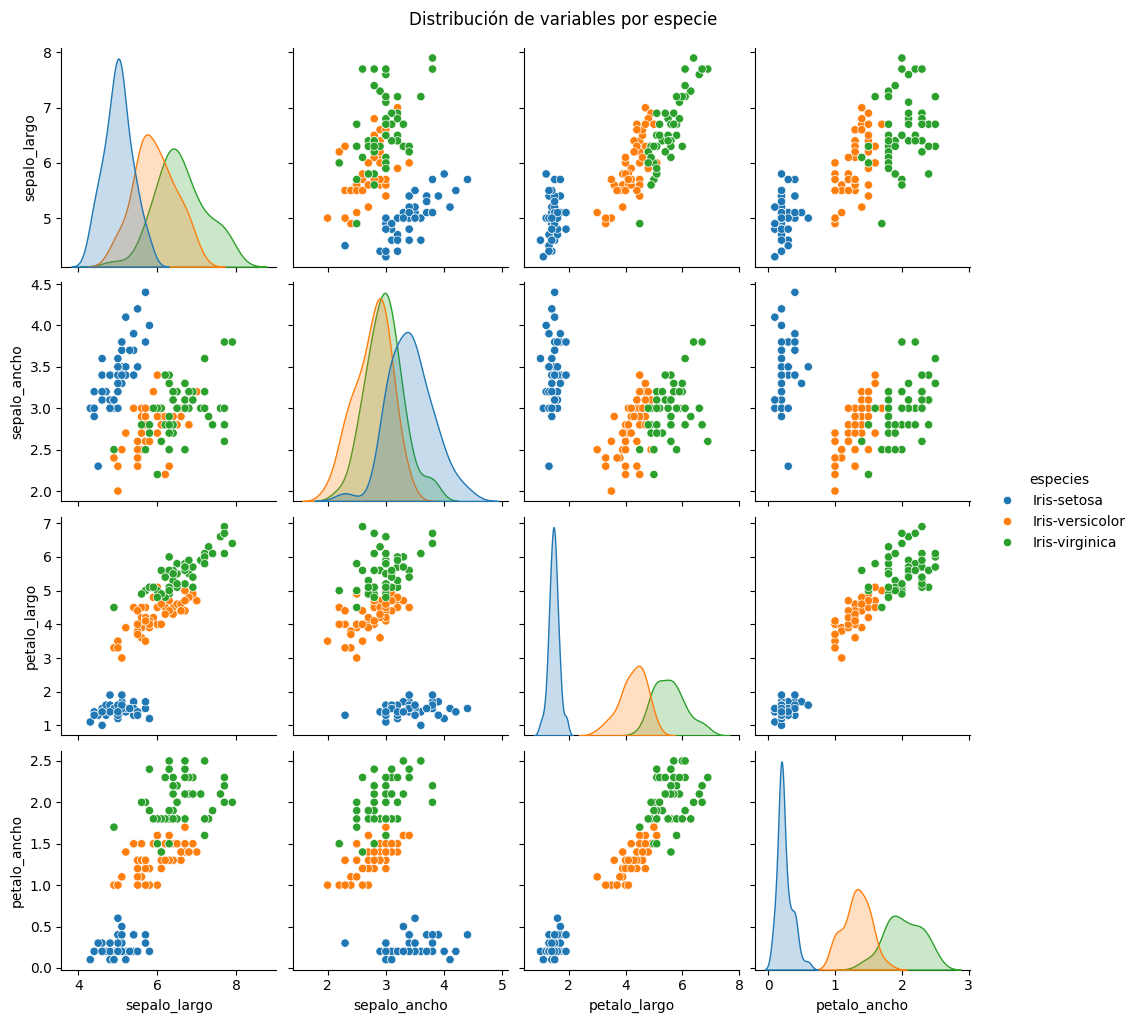

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot para ver la relación entre variables
sns.pairplot(df, hue='especies')
plt.suptitle('Distribución de variables por especie', y=1.02)
plt.show()

## 📌 Elección de Variables
Se seleccionaron las variables `petalo_largo` y `petalo_ancho` porque presentan una separación clara entre las especies, como se observa en el análisis exploratorio. Estas variables tienen una alta correlación con la clase y permiten construir un modelo simple y efectivo.


Matriz de confusión:
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

Reporte de clasificación:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



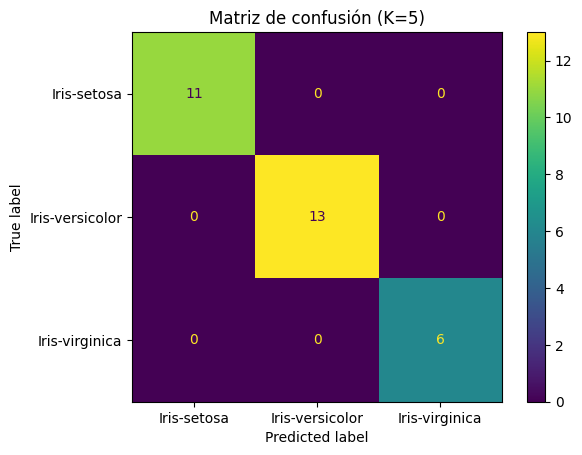

In [4]:
# ✅ Clasificación con KNN - Versión modificada para entrega

# Importamos las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# 1. Cargamos el dataset Iris desde una hoja de cálculo online (Google Sheets en formato CSV)
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSLgU6YF5djPgcJvcmXyqdIjfVefPsYlj6HUnRH15sZwsEL4GX7KPY-c3CWgM3n8vCljid-ZPocdAAl/pub?output=csv'
df = pd.read_csv(url)

# 2. Renombramos las columnas a nombres más simples y en español
df.rename({
    'SepalLengthCm': 'sepalo_largo',
    'SepalWidthCm': 'sepalo_ancho',
    'PetalLengthCm': 'petalo_largo',
    'PetalWidthCm': 'petalo_ancho',
    'Species': 'especies'
}, axis=1, inplace=True)

# Eliminamos la columna Id porque no es informativa para el modelo
df.drop('Id', axis=1, inplace=True)

# 3. Seleccionamos las variables de entrada y la variable objetivo
# En este caso usamos solo petalo_largo y petalo_ancho para simplificar
X = df[['petalo_largo', 'petalo_ancho']].values
y = df['especies'].values  # Variable objetivo (etiqueta)

# 4. Codificamos las etiquetas (de texto a números)
le = LabelEncoder()
y = le.fit_transform(y)  # Convierte por ejemplo 'Iris-setosa' -> 0, etc.

# 5. Dividimos los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 6. Creamos el modelo KNN con k = 5 vecinos (hiperparámetro modificado)
modelo = KNeighborsClassifier(n_neighbors=5)

# 7. Entrenamos el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# 8. Realizamos predicciones sobre los datos de prueba
y_pred = modelo.predict(X_test)

# 9. Evaluamos el rendimiento del modelo
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Visualizamos la matriz de confusión con etiquetas
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=le.classes_)
plt.title("Matriz de confusión (K=5)")
plt.show()


## 📈 Evaluación de Resultados
Se utilizó una matriz de confusión y un reporte de clasificación para evaluar el modelo. Los resultados muestran una alta precisión en las predicciones, especialmente en la correcta clasificación de las tres especies, con mínimos errores.

## ✅ Conclusión
El modelo KNN con k=5 y las variables `petalo_largo` y `petalo_ancho` ofrece una excelente clasificación para el dataset Iris. La selección de variables fue adecuada, logrando alta precisión con un modelo simple. Este enfoque demuestra que una buena exploración y selección de atributos puede llevar a soluciones efectivas y fáciles de interpretar.